Luis Alejandro Bordeth Rubio / 2240670

1er taller de metodos matematicos para fisicos

Ingrese las coordenadas del punto A separadas por comas (x,y): 1,3
Ingrese las coordenadas del punto B separadas por comas (x,y): 6,7
Ingrese las coordenadas del punto C separadas por comas (x,y): 9,1
Centroide G: Matrix([[5.33333333333333], [3.66666666666667]])


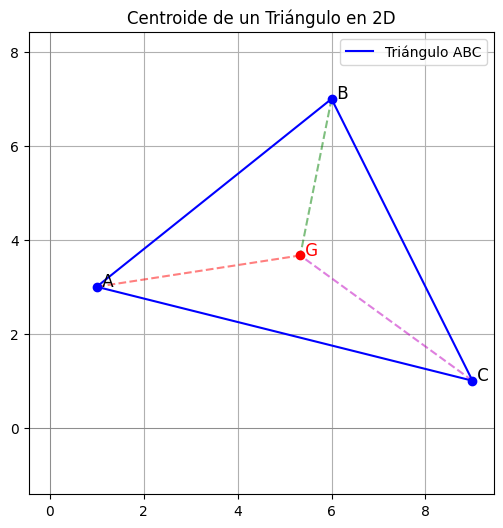

In [1]:
import sympy as sp
import matplotlib.pyplot as plt

# Función para leer un vector 2D
def leer_vector(nombre):
    coords = input(f"Ingrese las coordenadas del punto {nombre} separadas por comas (x,y): ")
    return sp.Matrix([float(x) for x in coords.split(",")])

# Leer vértices del triángulo
a = leer_vector("A")
b = leer_vector("B")
c = leer_vector("C")

# Calcular el centroide
g = (a + b + c) / 3

print(f"Centroide G: {g}")

# Graficar triángulo
x_vals = [a[0], b[0], c[0], a[0]]  # cerrar el triángulo
y_vals = [a[1], b[1], c[1], a[1]]

plt.figure(figsize=(6,6))
plt.plot(x_vals, y_vals, 'b-', label='Triángulo ABC')
plt.plot([a[0], g[0]], [a[1], g[1]], 'r--', alpha=0.5) # mediana desde A
plt.plot([b[0], g[0]], [b[1], g[1]], 'g--', alpha=0.5) # mediana desde B
plt.plot([c[0], g[0]], [c[1], g[1]], 'm--', alpha=0.5) # mediana desde C

# Puntos
plt.scatter([a[0], b[0], c[0]], [a[1], b[1], c[1]], color='blue', zorder=5)
plt.scatter(g[0], g[1], color='red', zorder=5)

# Etiquetas
plt.text(a[0], a[1], ' A', fontsize=12)
plt.text(b[0], b[1], ' B', fontsize=12)
plt.text(c[0], c[1], ' C', fontsize=12)
plt.text(g[0], g[1], ' G', fontsize=12, color='red')

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid(True)
plt.legend()
plt.title("Centroide de un Triángulo en 2D")
plt.axis('equal')
plt.show()


In [1]:
import sympy as sp
import math

# Definir vectores en la base e1,e2,e3
e1 = sp.Matrix([1,0,0])
e2 = sp.Matrix([0,1,0])
e3 = sp.Matrix([0,0,1])

a = 1*e1 + 2*e2 + 3*e3
b = 4*e1 + 5*e2 + 6*e3
c = 3*e1 + 2*e2 + 1*e3
d = 6*e1 + 5*e2 + 4*e3

# --- helper functions ---
def norm(v):
    return sp.sqrt((v.dot(v)).evalf())

def angle_between(u, v):
    # devuelve el ángulo en radianes y en grados
    dot = (u.dot(v)).evalf()
    nu = float(norm(u))
    nv = float(norm(v))
    # proteger contra errores numéricos
    if nu == 0 or nv == 0:
        return None, None
    cosang = max(-1.0, min(1.0, float(dot/(nu*nv))))
    ang_rad = math.acos(cosang)
    ang_deg = math.degrees(ang_rad)
    return ang_rad, ang_deg

def proj(u, v):
    # proyección de u sobre v (vector)
    denom = v.dot(v)
    if denom == 0:
        return None
    return (u.dot(v)/denom) * v

# --- a) Sumas solicitadas ---
sums = {
    "a+b+c+d": a + b + c + d,
    "a+b-c-d": a + b - c - d,
    "a-b+c-d": a - b + c - d,
    "-a+b-c+d": -a + b - c + d
}

# --- b) Ángulo entre a,b,c,d y los vectores base e1,e2,e3 ---
angles_with_bases = {}
for name, v in [("a",a),("b",b),("c",c),("d",d)]:
    angles_with_bases[name] = {}
    for base_name, base in [("e1",e1),("e2",e2),("e3",e3)]:
        rad, deg = angle_between(v, base)
        angles_with_bases[name][base_name] = (sp.N(rad,6), round(deg,6))

# --- c) Magnitudes de a,b,c,d ---
magnitudes = {name: sp.N(norm(v), 6) for name, v in [("a",a),("b",b),("c",c),("d",d)]}

# --- d) Ángulo entre a y b, entre c y d ---
ang_a_b = angle_between(a,b)
ang_c_d = angle_between(c,d)

# --- e) Proyección de a sobre b ---
proj_a_on_b = proj(a,b)

# --- f) ¿son a,b,c,d coplanarios? ---
# En R^3: para que los cuatro vectores sean coplanares, la matriz con ellos como columnas debe tener rango <= 2.
M = sp.Matrix.hstack(a, b, c, d)
rank_M = M.rank()
coplanar = (rank_M <= 2)

# --- g) (a + b) · (c + d) ---
dot_expr = (a + b).dot(c + d)

# --- h) Productos cruz y ángulos con d ---
cross_ab = a.cross(b)
cross_bc = b.cross(c)
cross_cd = c.cross(d)

angle_crossab_d = angle_between(cross_ab, d)
angle_crossbc_d = angle_between(cross_bc, d)
angle_crosscd_d = angle_between(cross_cd, d)

# --- i) c · (a × b) (producto triple escalar) ---
triple = c.dot(a.cross(b))

# --- Impresiones ---
print("Vectores (componentes):")
print("a =", a)
print("b =", b)
print("c =", c)
print("d =", d)
print("\n(a) Sumas:")
for k,v in sums.items():
    print(f" {k} = {sp.simplify(v)}")

print("\n(b) Ángulos entre cada vector y las bases (rad, grados):")
for vec, dic in angles_with_bases.items():
    print(f" {vec}:")
    for base, (rad,deg) in dic.items():
        print(f"   con {base}: {rad} rad, {deg}°")

print("\n(c) Magnitudes:")
for k,v in magnitudes.items():
    print(f" |{k}| = {v}")

print("\n(d) Ángulos:")
print(f" ángulo entre a y b: {sp.N(ang_a_b[0],6)} rad = {round(ang_a_b[1],6)}°")
print(f" ángulo entre c y d: {sp.N(ang_c_d[0],6)} rad = {round(ang_c_d[1],6)}°")

print("\n(e) Proyección de a sobre b (vector):")
print(" proj_b(a) =", sp.simplify(proj_a_on_b))

print("\n(f) ¿Son a,b,c,d coplanares?")
print(" Matriz [a b c d] (columnas):\n", M)
print(" rango =", rank_M)
print("=> Coplanares (rango <= 2)?", coplanar)

print("\n(g) (a + b) · (c + d) = ", sp.simplify(dot_expr))

print("\n(h) Productos cruz y ángulos con d:")
print(" a × b =", cross_ab, "  |a×b| =", sp.N(norm(cross_ab),6))
print(f"  ángulo entre a×b y d: {sp.N(angle_crossab_d[0],6)} rad = {round(angle_crossab_d[1],6)}°")
print(" b × c =", cross_bc, "  |b×c| =", sp.N(norm(cross_bc),6))
print(f"  ángulo entre b×c y d: {sp.N(angle_crossbc_d[0],6)} rad = {round(angle_crossbc_d[1],6)}°")
print(" c × d =", cross_cd, "  |c×d| =", sp.N(norm(cross_cd),6))
print(f"  ángulo entre c×d y d: {sp.N(angle_crosscd_d[0],6)} rad = {round(angle_crosscd_d[1],6)}°")

print("\n(i) Producto triple c · (a × b) = ", sp.simplify(triple))


Vectores (componentes):
a = Matrix([[1], [2], [3]])
b = Matrix([[4], [5], [6]])
c = Matrix([[3], [2], [1]])
d = Matrix([[6], [5], [4]])

(a) Sumas:
 a+b+c+d = Matrix([[14], [14], [14]])
 a+b-c-d = Matrix([[-4], [0], [4]])
 a-b+c-d = Matrix([[-6], [-6], [-6]])
 -a+b-c+d = Matrix([[6], [6], [6]])

(b) Ángulos entre cada vector y las bases (rad, grados):
 a:
   con e1: 1.30025 rad, 74.49864°
   con e2: 1.00685 rad, 57.688467°
   con e3: 0.640522 rad, 36.699225°
 b:
   con e1: 1.09748 rad, 62.880857°
   con e2: 0.964530 rad, 55.263519°
   con e3: 0.817888 rad, 46.861562°
 c:
   con e1: 0.640522 rad, 36.699225°
   con e2: 1.00685 rad, 57.688467°
   con e3: 1.30025 rad, 74.49864°
 d:
   con e1: 0.817888 rad, 46.861562°
   con e2: 0.964530 rad, 55.263519°
   con e3: 1.09748 rad, 62.880857°

(c) Magnitudes:
 |a| = 3.74166
 |b| = 8.77497
 |c| = 3.74166
 |d| = 8.77497

(d) Ángulos:
 ángulo entre a y b: 0.225726 rad = 12.933154°
 ángulo entre c y d: 0.225726 rad = 12.933154°

(e) Proyección de a 